# Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Simple Linear Regression

$y = b_0 + b_1 X$

$b_0$ - intercept

$b_1$ - slope coefficient

In [2]:
# X - area, y - price
X = np.array([40, 60, 50, 80, 200, 150, 75, 45, 140, 100, 120, 165, 135])
y = np.array([100000, 120000, 125000, 150000, 300000, 220000, 105000, 110000, 200000, 100000, 165000, 240000, 230000])

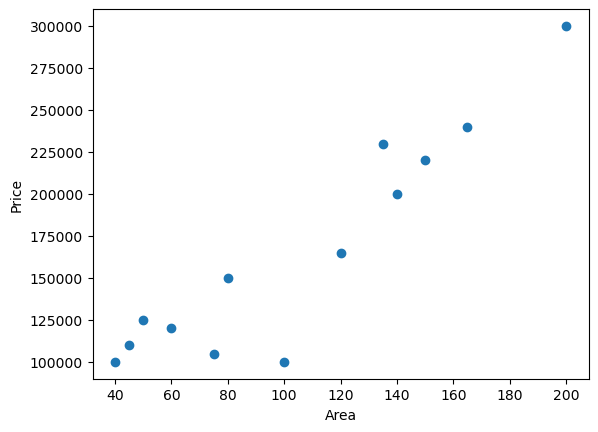

In [3]:
plt.scatter(X, y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

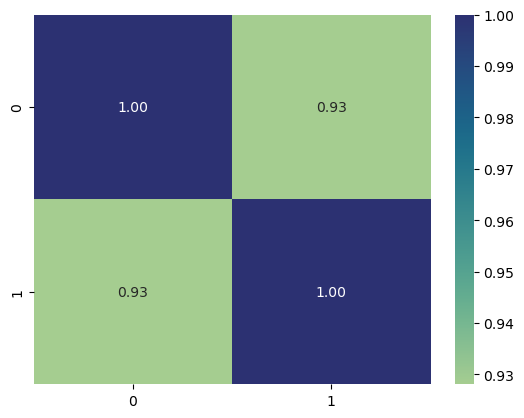

In [4]:
sns.heatmap(np.corrcoef(X, y), annot=True, fmt=".2f", cmap="crest")
plt.show()

$b_1 = \frac{\operatorname{Cov}(X, Y)}{\operatorname{Var}(X)}$

$b_1 = \frac{\sum_{i=1}^{n} \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2}$

In [5]:
b1 = sum((X - X.mean()) * (y - y.mean())) / sum((X - X.mean())**2)
b1

np.float64(1184.8837209302328)

In [6]:
b0 = y.mean() - b1 * X.mean()
b0

np.float64(42581.39534883718)

In [7]:
y_pred = b0 + b1 * X
y_pred

array([ 89976.74418605, 113674.41860465, 101825.58139535, 137372.09302326,
       279558.13953488, 220313.95348837, 131447.6744186 ,  95901.1627907 ,
       208465.11627907, 161069.76744186, 184767.44186047, 238087.20930233,
       202540.69767442])

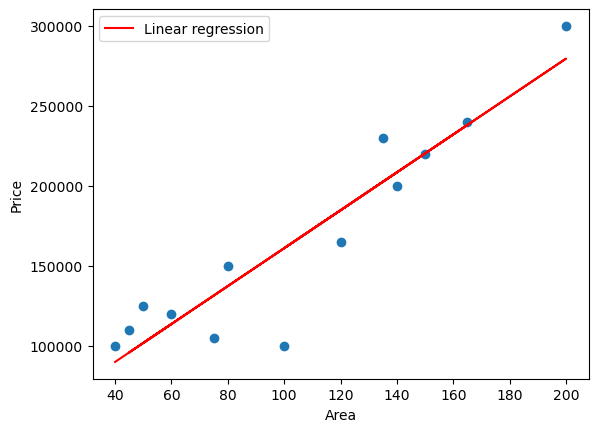

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="r", label="Linear regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [9]:
X_test = np.array([50, 100, 150, 200, 250])
y_pred = b0 + b1 * X_test
y_pred

array([101825.58139535, 161069.76744186, 220313.95348837, 279558.13953488,
       338802.3255814 ])

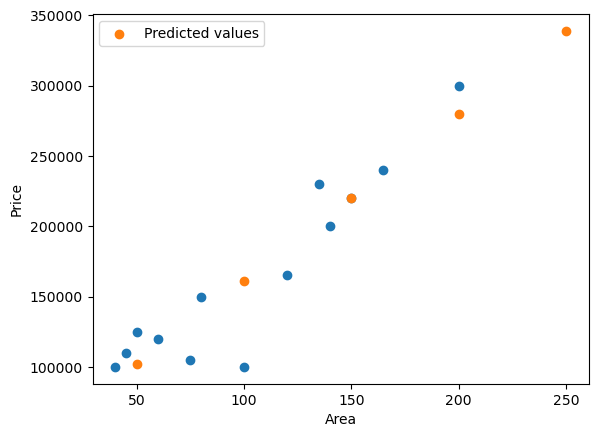

In [10]:
plt.scatter(X, y)
plt.scatter(X_test, y_pred, label="Predicted values")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

## Multiple Linear Regression

$y = b_0 + b_1 X_1 + b_2 X_2 + \dots + b_n X_n = b^\top X$

In [11]:
diabetes = load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
X = diabetes.data[:, [0, 1, 2]]
y = diabetes.target
X.shape, y.shape

((442, 3), (442,))

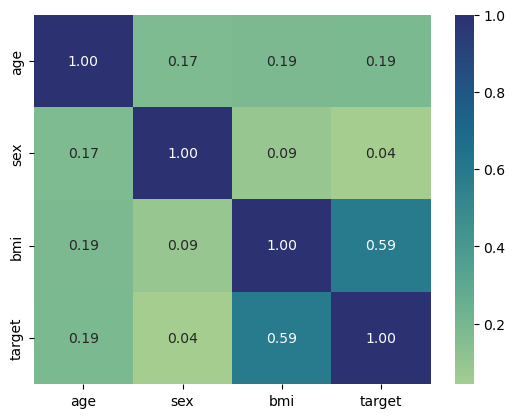

In [13]:
labels = [diabetes.feature_names[i] for i in [0, 1, 2]] + ["target"]
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=labels)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="crest")
plt.show()

$b = \left( X^\top X \right)^{-1} X^\top y$

In [14]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        ,  0.03807591,  0.05068012,  0.06169621],
       [ 1.        , -0.00188202, -0.04464164, -0.05147406],
       [ 1.        ,  0.08529891,  0.05068012,  0.04445121],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, -0.01590626],
       [ 1.        , -0.04547248, -0.04464164,  0.03906215],
       [ 1.        , -0.04547248, -0.04464164, -0.0730303 ]])

In [15]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([152.13348416, 138.9039107 , -36.13526678, 926.91201212])

In [16]:
y_pred = X @ b
y_pred[:10]

array([212.77799178, 105.77327648, 203.35285981, 130.62787281,
       120.76894148, 103.14930114, 100.27006169, 157.36682783,
       213.28256558, 180.10547882])

$MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|$

In [17]:
print(f"MAE: {mean_absolute_error(y, y_pred):.6f}")

MAE: 51.897970


$MSE = {\frac{1}{n} \sum (y_i - \hat{y}_i)^2}$

In [18]:
print(f"MSE: {mean_squared_error(y, y_pred):.6f}")

MSE: 3848.943758


$RMSE = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}$

In [19]:
print(f"RMSE: {root_mean_squared_error(y, y_pred):.6f}")

RMSE: 62.039856


$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} = \sum (y_i - \hat{y}_i)^2$

$SS_{tot} = \sum (y_i - \bar{y})^2$

In [20]:
print(f"R^2: {r2_score(y, y_pred):.6f}")

R^2: 0.350924


# Student Performance (Multiple Linear Regression)

[Student Performance Dataset on Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv("../data/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


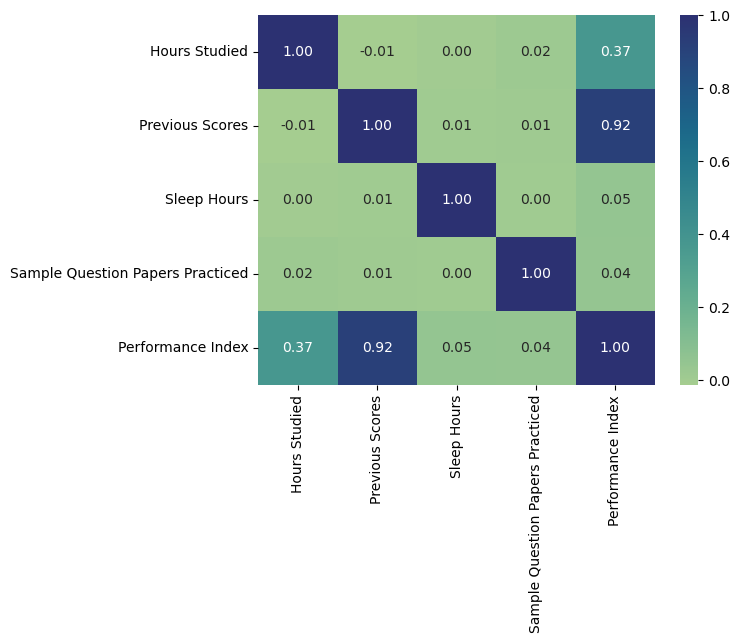

In [24]:
df_num = df.select_dtypes(include=["number"])
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="crest")
plt.show()

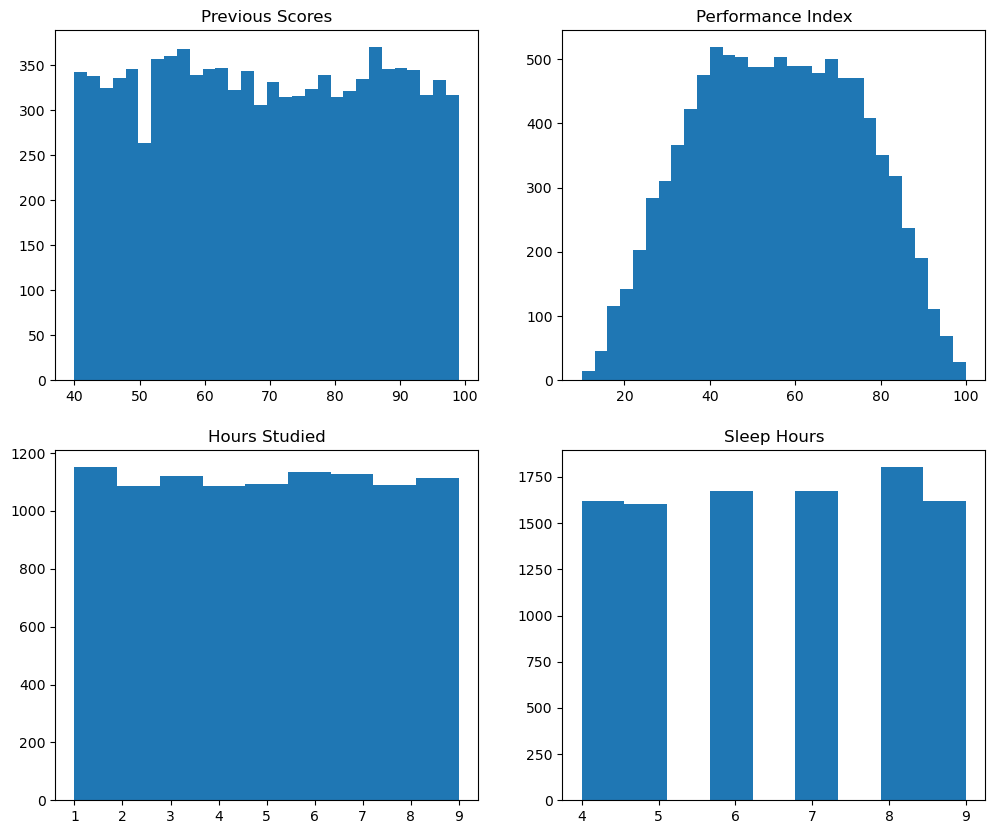

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.title("Previous Scores")
plt.hist(df_num["Previous Scores"], bins=30)

plt.subplot(222)
plt.title("Performance Index")
plt.hist(df_num["Performance Index"], bins=30)

plt.subplot(223)
plt.title("Hours Studied")
plt.hist(df_num["Hours Studied"], bins=9)

plt.subplot(224)
plt.title("Sleep Hours")
plt.hist(df_num["Sleep Hours"], bins=9)

plt.show()

In [26]:
X = np.array(df_num["Previous Scores"])
y = np.array(df_num["Performance Index"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
model.intercept_, model.coef_

(np.float64(-15.104435146089493), array([1.0127272]))

In [28]:
y_pred = model.predict(X_train.reshape(-1, 1))
y_pred

array([34.5191978 , 33.50647059, 66.92646829, ..., 33.50647059,
       32.49374339, 31.48101619])

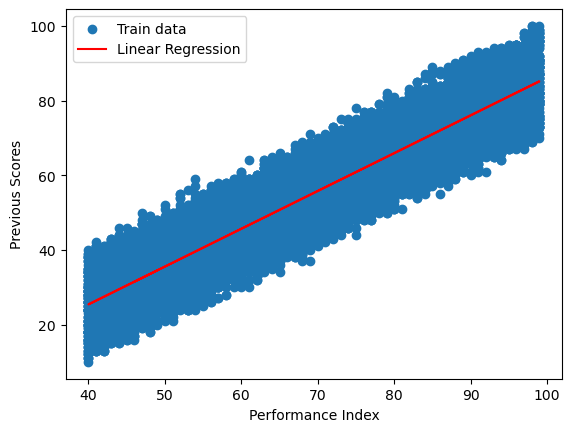

In [29]:
plt.scatter(X_train, y_train, label="Train data")
plt.plot(X_train, y_pred, c="r", label="Linear Regression")
plt.xlabel("Performance Index")
plt.ylabel("Previous Scores")
plt.legend()
plt.show()

$x' = \frac{x - \mu}{\sigma}$

In [30]:
scaler = StandardScaler()
data_std = scaler.fit_transform(df_num)

X = data_std[:, :-1]
y = data_std[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model.fit(X_train, y_train)
model.intercept_, model.coef_

(np.float64(0.00082729344786435),
 array([0.38448927, 0.91807689, 0.04177908, 0.02861389]))

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.6f}")
print(f"R^2: {r2_score(y_test, y_pred):.6f}")

MAE: 0.084828
MSE: 0.011331
RMSE: 0.106449
R^2: 0.988714
